# Histogram Equalization


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

From Homework 1:

In [5]:
def image_histogram_equalization(image, number_bins=256):

    img_array = np.asarray(image)
    
    """
    Part (a): Normalized cumulative histogram
    """
    # Calculate histogram aka probability density function via binning, and normalize
    hist = np.zeros([number_bins])
    for i in img_array.flatten():
        hist[int(i // (256 - number_bins + 1))] += 1

    hist /= np.sum(hist)
    
    # Calculate cumulative histogram aka cumulative density function
    chistogram_array = np.empty([number_bins, 1])
    
    curr = 0
    for i in range(number_bins):
        curr += hist[i]
        chistogram_array[i,:] = curr

    """
    Part (c): compute the transform map T using cdf
    """
    transform_map = np.zeros([number_bins, 1]).astype(np.uint8)

    for i in range(number_bins):
        transform_map[i,:] = chistogram_array[i,:] * (number_bins - 1)

    """
    STEP 3: Apply the transformation T to reassign equalized pixel intensity 
    """    

    for i in np.nditer(img_array, op_flags=['readwrite']):
        v = transform_map[int(i // (256 - number_bins + 1)),:]
        i *= np.uint8(0)
        i += v[0]
            
    eq_img_array = img_array

    return eq_img_array

In [6]:
def load_rgb(path, display=True):
    img_crowd = plt.imread(path)
    h, w = img_crowd.shape[:2]
    
    if display:
        plt.figure(figsize = [10, 10])
        plt.axis('off')
        plt.imshow(img_crowd)

    return img_crowd

def equalize_rgb(img, bins=256, display=True):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    img_v = img_hsv[:,:,2]
    img_equalized = image_histogram_equalization(img_v, bins)

    h, w = img_v.shape[:2]

    for y in range(h):
        for x in range(w):
            img_hsv[y, x, 2] = img_equalized[y, x]
    
    img_rgb = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

    if display:
        plt.figure(figsize = [10, 10])
        plt.axis('off')
        plt.imshow(img_rgb)

    return img_rgb

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


16
32
48


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


64
80


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


96
112


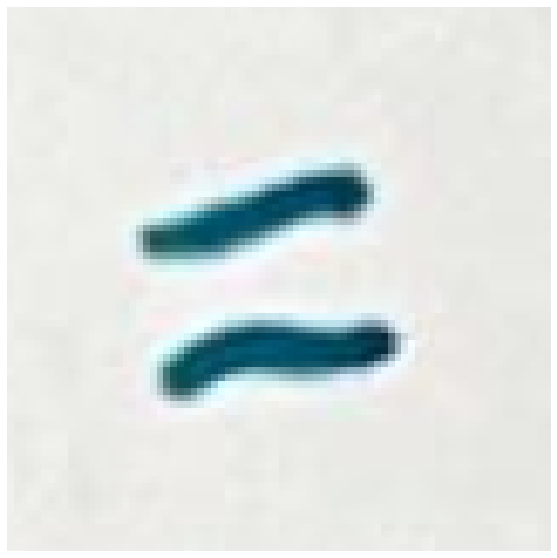

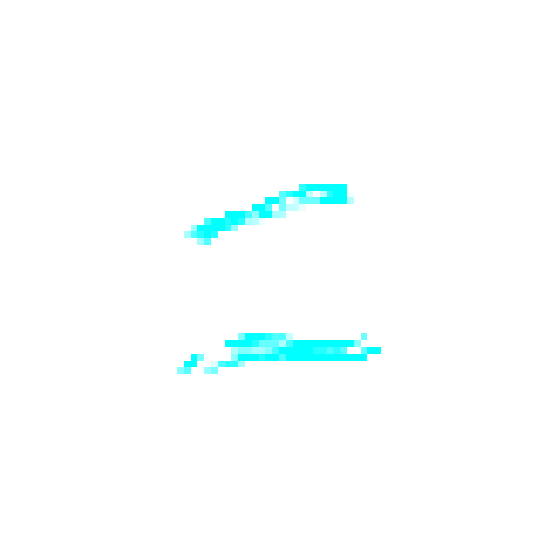

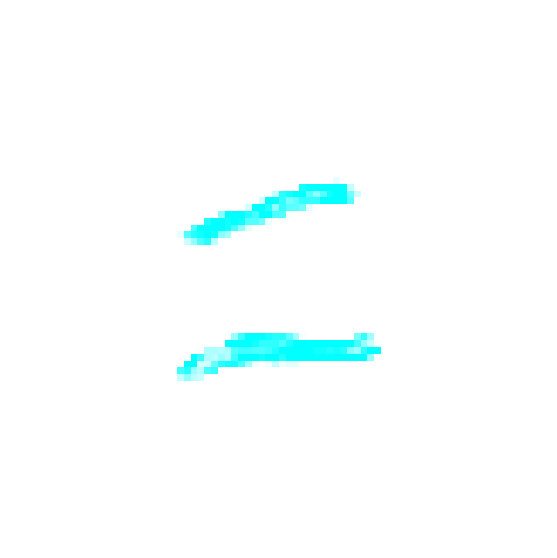

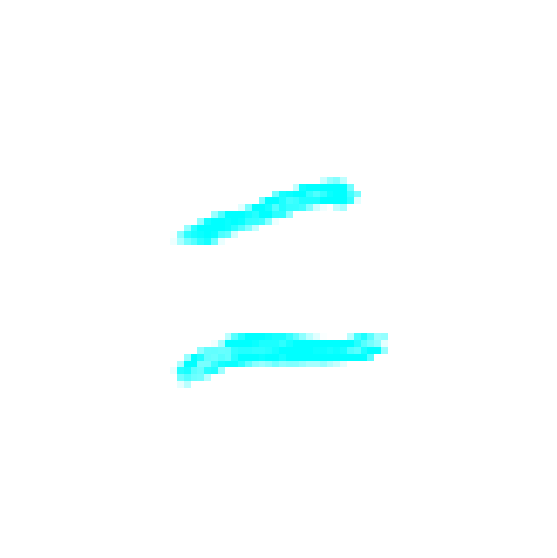

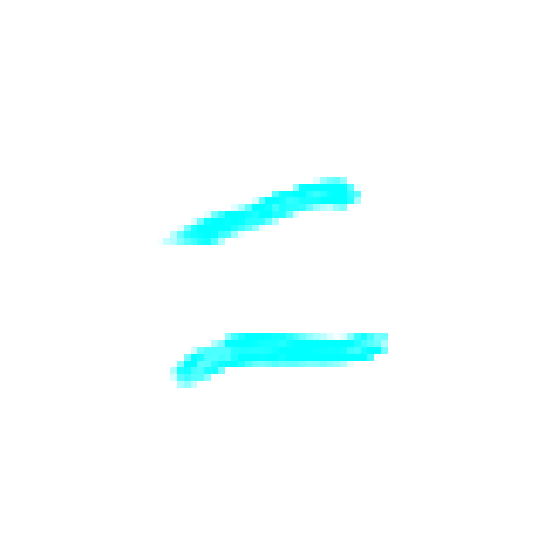

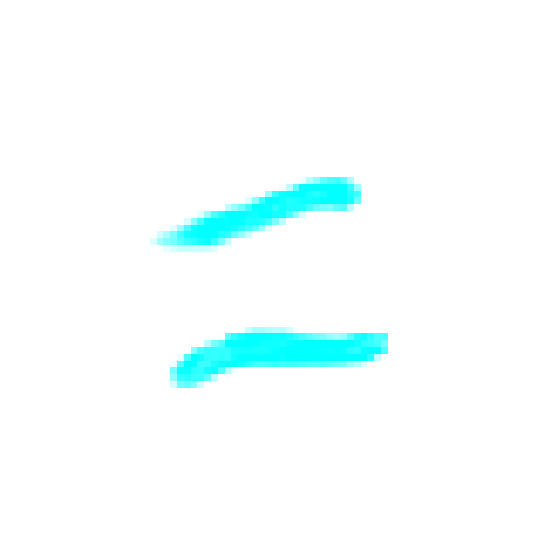

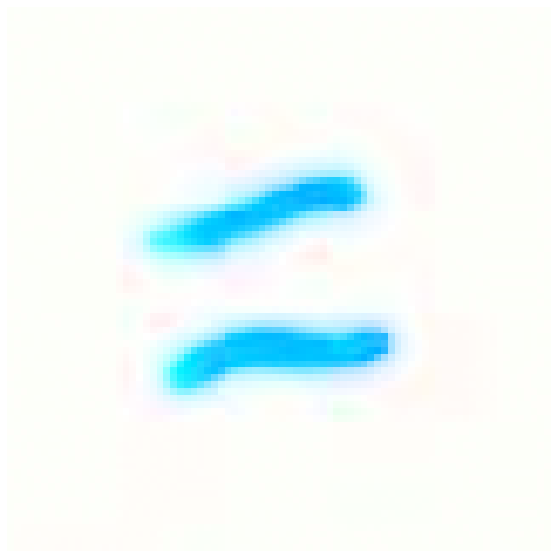

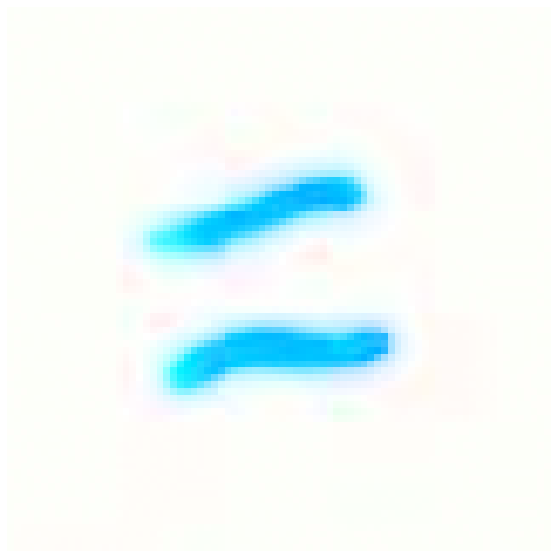

In [13]:
img = load_rgb('../dataset/handwritten equations/=/blue = 3.png')

for i in range(16, 128, 16):
    equalize_rgb(img, 256 // i)

# Thresholding

Threshold on the median

In [37]:
def median_threshold(img, display=True):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    median = np.median(img_gray)

    img_gray[img_gray >= median] = 255
    img_gray[img_gray < median] = 0

    if display:
        plt.figure(figsize = [10, 10])
        plt.axis('off')
        plt.imshow(img_gray, cmap="gray")

    return img_gray

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


15.0


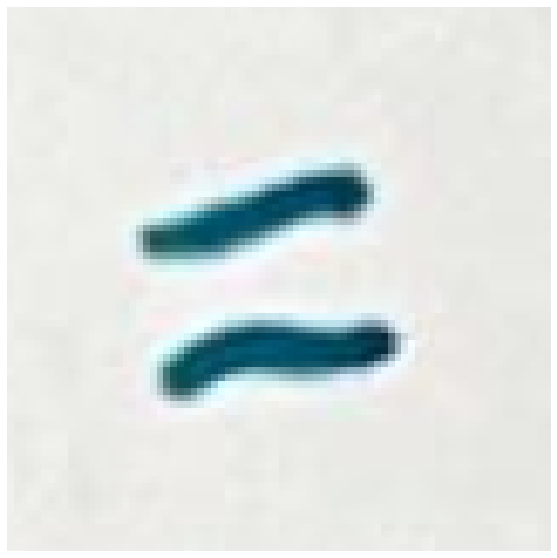

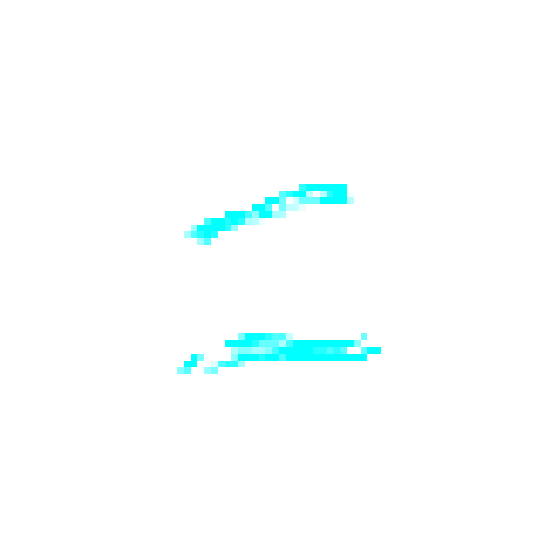

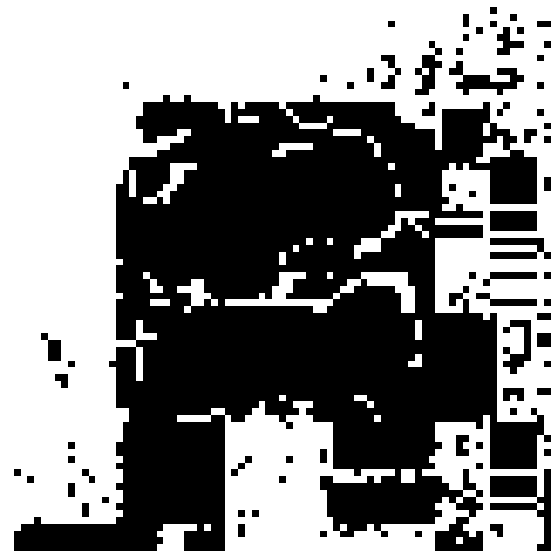

In [36]:
img = load_rgb('../dataset/handwritten equations/=/blue = 3.png')
img = equalize_rgb(img, 16)
img = median_threshold(img)

Arbitrary threshold

In [33]:
def threshold(img, threshold, display=True):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    img_gray[img_gray >= threshold] = 255
    img_gray[img_gray < threshold] = 0

    if display:
        plt.figure(figsize = [10, 10])
        plt.axis('off')
        plt.imshow(img_gray, cmap="gray")

    return img_gray

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


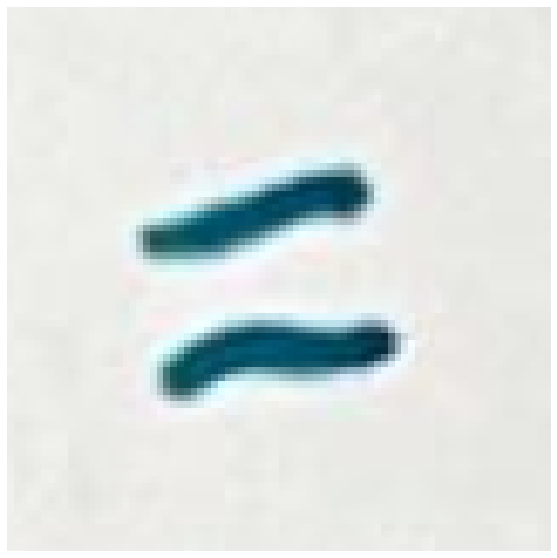

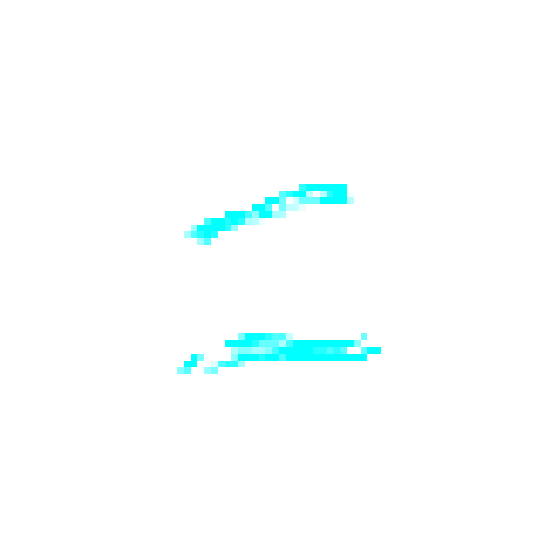

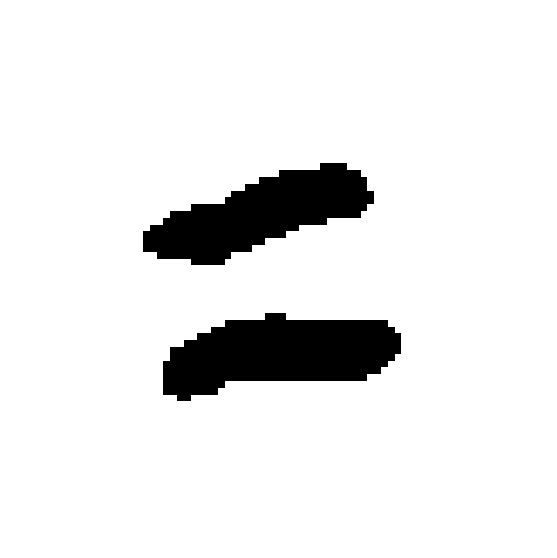

In [43]:
img = load_rgb('../dataset/handwritten equations/=/blue = 3.png')
img = equalize_rgb(img, 16)
img = threshold(img, 14)